In [3]:
import pandas as pd
import sys 
import os 
# Add the parent directory to the Python path 
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
from scripts.data_cleaning import get_xdr_data, clean_xdr_data

In [8]:
# Top 10 customers per engagement metric 

# Get data from PostgreSQL
df = get_xdr_data()

# Aggregate metrics per customer ID (MSISDN)
customer_metrics = df.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'sum',
    'HTTP DL (Bytes)': 'sum',
    'HTTP UL (Bytes)': 'sum'
}).reset_index()

# Compute total data (DL + UL)
customer_metrics['Total_Data'] = customer_metrics['HTTP DL (Bytes)'] + customer_metrics['HTTP UL (Bytes)']

# Report the top 10 customers per engagement metric
top_10_duration = customer_metrics.nlargest(10, 'Dur. (ms)')
top_10_data = customer_metrics.nlargest(10, 'Total_Data')

print("Top 10 customers by total duration:")
print(top_10_duration)

print("\nTop 10 customers by total data:")
print(top_10_data)


Top 10 customers by total duration:
       MSISDN/Number   Dur. (ms)  HTTP DL (Bytes)  HTTP UL (Bytes)  \
13180   3.362578e+10  18553754.0     1.957540e+05          67482.0   
6437    3.361489e+10   9966898.0     7.019594e+07        4999215.0   
92923   3.376054e+10   9279434.0     3.286280e+07        3295498.0   
13526   3.362632e+10   8791927.0     1.720802e+06         327919.0   
65118   3.366716e+10   8744914.0     2.524831e+07         736250.0   
50281   3.366284e+10   6614270.0     2.275949e+09       35281440.0   
57160   3.366469e+10   6288730.0     0.000000e+00              0.0   
666     3.360313e+10   6287761.0     1.070111e+07        1749616.0   
66029   3.366746e+10   5649882.0     0.000000e+00              0.0   
92577   3.376041e+10   5321667.0     5.433763e+07        3400673.0   

         Total_Data  
13180  2.632360e+05  
6437   7.519515e+07  
92923  3.615830e+07  
13526  2.048721e+06  
65118  2.598456e+07  
50281  2.311231e+09  
57160  0.000000e+00  
666    1.245073e+

1    98920
0     7891
2       45
Name: Cluster, dtype: int64


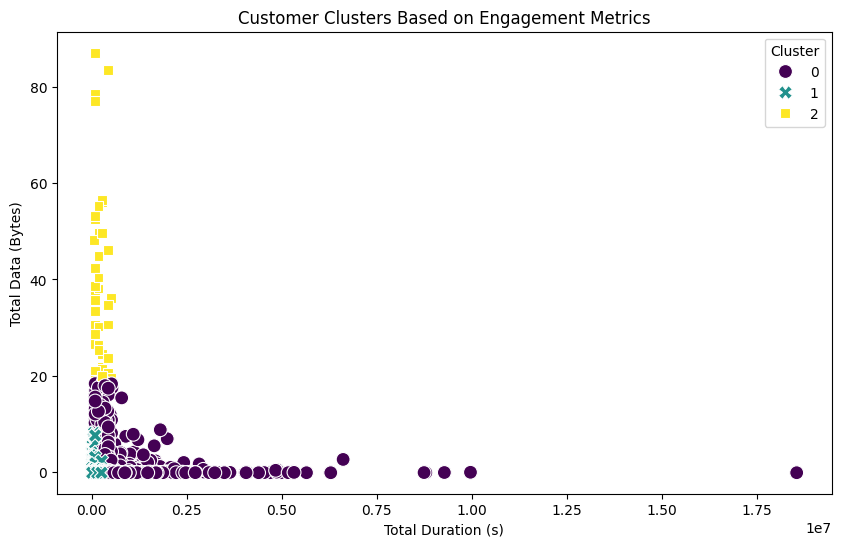

In [10]:
# Three groups of engagement

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalize the metrics
scaler = StandardScaler()
customer_metrics[['Dur. (s)', 'Total_Data']] = scaler.fit_transform(customer_metrics[['Dur. (ms)', 'Total_Data']])

# Run k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=0).fit(customer_metrics[['Dur. (ms)', 'Total_Data']])
customer_metrics['Cluster'] = kmeans.labels_

# Display the clusters
print(customer_metrics['Cluster'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_metrics, x='Dur. (ms)', y='Total_Data', hue='Cluster', palette='viridis', style='Cluster', s=100)
plt.title('Customer Clusters Based on Engagement Metrics')
plt.xlabel('Total Duration (s)')
plt.ylabel('Total Data (Bytes)')
plt.legend(title='Cluster')
plt.show()


In [11]:
# Compute minimum, maximum, average, and total for each cluster
# Reverse normalization to original scale for interpretation
customer_metrics[['Dur. (ms)', 'Total_Data']] = scaler.inverse_transform(customer_metrics[['Dur. (ms)', 'Total_Data']])

# Compute metrics for each cluster
cluster_stats = customer_metrics.groupby('Cluster').agg({
    'Dur. (ms)': ['min', 'max', 'mean', 'sum'],
    'Total_Data': ['min', 'max', 'mean', 'sum']
}).reset_index()

print(cluster_stats)


  Cluster     Dur. (ms)                                            \
                    min           max          mean           sum   
0       0  1.553996e+10  3.457637e+12  1.003086e+11  7.915355e+14   
1       1  1.331114e+09  6.197623e+10  2.140463e+10  2.117346e+15   
2       2  1.045910e+10  9.603759e+10  4.058866e+10  1.826490e+12   

     Total_Data                                            
            min           max          mean           sum  
0  0.000000e+00  1.583609e+10  3.379095e+08  2.666443e+12  
1  0.000000e+00  7.364449e+09  3.970356e+07  3.927477e+12  
2  1.640614e+10  7.302069e+10  3.231408e+10  1.454133e+12  


In [ ]:
# Top 10 most engaged users per application

# Aggregate traffic per application
application_traffic = df.groupby('MSISDN/Number').agg({
    'Social Media DL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum'
}).reset_index()

# Report the top 10 most engaged users per application
top_10_social_media = application_traffic.nlargest(10, 'Social Media DL (Bytes)')
top_10_google = application_traffic.nlargest(10, 'Google DL (Bytes)')
top_10_youtube = application_traffic.nlargest(10, 'Youtube DL (Bytes)')

print("Top 10 customers by social media data:")
print(top_10_social_media)

print("\nTop 10 customers by Google data:")
print(top_10_google)

print("\nTop 10 customers by YouTube data:")
print(top_10_youtube)


Top 10 customers by social media data:
        MSISDN/Number  Social Media DL (Bytes)  Google DL (Bytes)  \
13526    3.362632e+10               42743837.0        116106455.0   
92923    3.376054e+10               39297646.0         88626532.0   
37052    3.365973e+10               34900444.0         90958549.0   
6437     3.361489e+10               27749744.0         93941708.0   
13180    3.362578e+10               26564121.0        107904739.0   
65118    3.366716e+10               23753753.0         71707826.0   
106137   3.378632e+10               23568655.0         78819810.0   
70960    3.366907e+10               23477047.0         54915216.0   
666      3.360313e+10               22776679.0         73942055.0   
31331    3.365849e+10               22695673.0         55457602.0   

        Email DL (Bytes)  Youtube DL (Bytes)  Netflix DL (Bytes)  \
13526         33404785.0         164048706.0         199479238.0   
92923         26437895.0         194068298.0         146500839.0 

In [19]:
import plotly.express as px

# Plot top 3 applications
top_3_apps = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Youtube DL (Bytes)']
for app in top_3_apps:
    fig = px.bar(application_traffic.nlargest(10, app),
                 x='MSISDN/Number', y=app,
                 title=f'Top 10 Customers by {app}',
                 labels={'MSISDN': 'Customer ID', app: 'Data (Bytes)'})
    fig.show()


In [ ]:
# Determine Optimized Value of k (Elbow Method)
# Find the optimized value of k using elbow method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(customer_metrics[['Dur. (s)', 'Total_Data']])
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.show()
